In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import boxcluster
from boxcluster import BoxList
from boxcluster import BoxSort
from boxcluster.boxsort import BoxSort2

from boxcluster.fake_data import generate_nested_data

In [3]:
import pandas as pd
import numpy as np

In [4]:
from plotting import mplot
import matplotlib.pyplot as plt

Solution


/Users/peterwinter/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


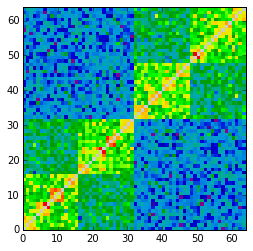

Test


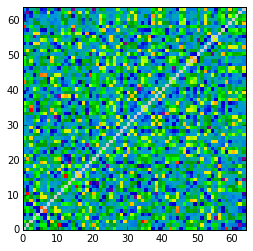

In [5]:
test_soln = generate_nested_data(noise=0.05)
print('Solution')
mplot(test_soln)

n = len(test_soln)
order = np.arange(n)
np.random.shuffle(order)
test = test_soln[:, order][order, :]
print('Test')
mplot(test)

# Test existing code

Result


/Users/peterwinter/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


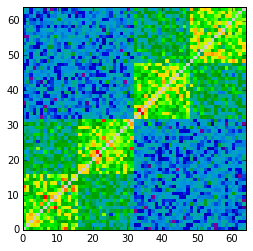

[19 54 55 25 36 33 10 41 20  1 51  5 44 17  6  9 47 29 21 35  8  2 34  0 48
 49 42 26 43 24 14 58 40 15 12 38 13 62 31  4 56 16 18  3 53  7 11 28 52 22
 37 46 59 39 61 50 30 60 57 27 45 23 32 63]


In [6]:
bs = BoxSort(test)
ds_result, ds_order = bs()
print('Result')
mplot(ds_result)
print(ds_order)

# new annealer

Result


/Users/peterwinter/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


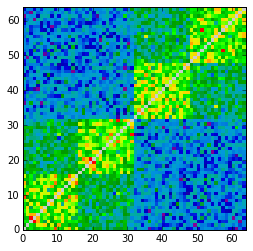

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 61]


In [7]:
bs2 = BoxSort2(test)
bs2_result = bs2(save_history=True)
print('Result')
mplot(bs2_result.matrix)
print(bs2_result.order)

In [8]:
df = pd.DataFrame(bs2.history).set_index('evals')
df.head()

,last_move,moves_this_temp,move_accepted,temp,current_fit,new_fit
evals,,,,,,
0,1,1,True,0.00100,1075.994114,1075.994114
1,2,1,True,0.00099,1075.994114,1075.664655
2,0,2,True,0.00099,1075.664655,1075.835097
3,0,3,True,0.00099,1075.835097,1076.082540
4,1,4,True,0.00099,1076.082540,1076.082540


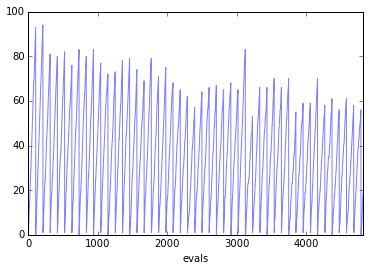

In [9]:
df['moves_this_temp'].plot(alpha=0.5)

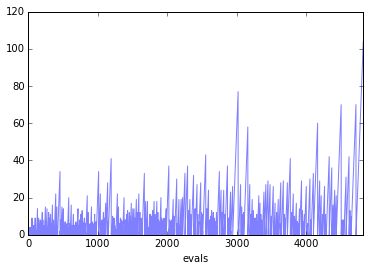

In [10]:
df['last_move'].plot(alpha=0.5)

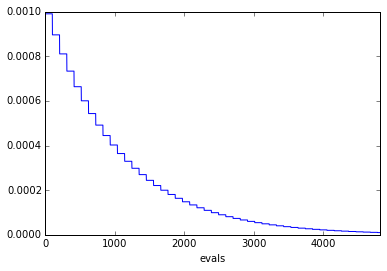

In [11]:
df['temp'].plot()

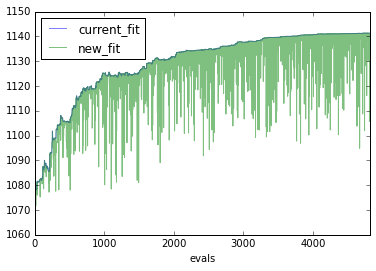

In [12]:
df[['current_fit', 'new_fit']].plot(alpha=0.5)

In [13]:
# fig, ax = plt.subplots()
# df[['current_fit', 'new_fit']].plot(ax=ax, alpha=0.5)
# ax.set_xlim(8000, 10000)
# ax.set_ylim(1137.7, 1137.75)

# result check

/Users/peterwinter/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


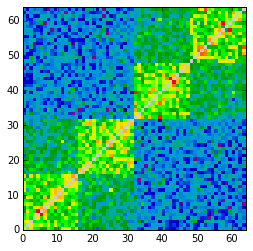

1141.7768377797465

In [14]:
bs = BoxSort(test)
ds_result, ds_order = bs()
mplot(ds_result)
bs.best_fitness

1141.58887691


/Users/peterwinter/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


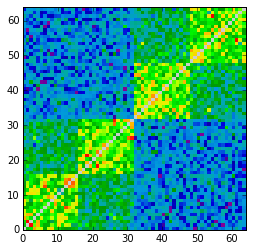

In [15]:
bs2 = BoxSort2(test)
bs2_result = bs2()
print(bs2_result.fitness)
mplot(bs2_result.matrix)

# Speedtest

In [22]:
def sort():
    bs = BoxSort(test)
    ds_result, ds_order = bs()
    return ds_result

%timeit sort()

1 loops, best of 3: 5.49 s per loop


In [23]:
def sort2():
    bs2 = BoxSort2(test)
    bs2_result = bs2()
    return bs2_result
    
%timeit sort2()

1 loops, best of 3: 4.07 s per loop


# TroubleShooting BoxOrder object

In [20]:
from boxcluster.boxorder import BaseFitMatrix, BaseSortMatrix, OrderedArray

In [21]:
bo = OrderedArray(test_soln)
bo2 = bo.copy()
bo.order

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [ ]:
bsm = BaseSortMatrix(test_soln)
m = bsm.matrix
mplot(m)
bsm.order

In [ ]:
self = bsm.copy()
self.reorder(order=random_order)

mplot(self.matrix)
print(self.order)
print(random_order)

In [ ]:
assert (self.order == random_order).all()

In [ ]:

random_order = np.arange(len(test_soln))
np.random.shuffle(random_order)
random_order

m = self.reorder(order=random_order)
mplot(m)
self.order[self.inverse_order()], self.order


inverse = self.inverse_order()
m2 = m[inverse, :][:, inverse]
mplot(m2)

m = self.matrix
mplot(m)
m = self.origional_matrix()
mplot(m)

In [ ]:
mat, new_ord = bo2.propose_move()
print(bo2.fitness, bo.fitness)
mplot(mat)
mplot(bo.matrix)
mplot(test_soln)